In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
prod = pd.read_csv('product_revenue.csv')

In [4]:
prod.head()

,yitemrevenue,xcartadd,xcartuniqadd,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xproductviews,xuniqprodview,xprodviewinrs
0,39215.93,614,503,752186,10,10,11990,24306,20498,299
1,23819.47,833,622,425667,8,5,3992,11171,8718,571
2,4415.45,122,101,121878,2,2,1998,6926,6017,6919074
3,57435.56,239,196,609761,2,2,4998,11250,9733,2834
4,0.00,32,22,58488,0,0,0,872,764,1745628


In [5]:
prod.describe()

,yitemrevenue,xcartadd,xcartuniqadd,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xproductviews,xuniqprodview,xprodviewinrs
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01
mean,3679.082174,39.500000,30.347826,48131.826087,1.423913,0.880435,1962.402174,1331.576087,1084.891304,1.380471e+06
std,8120.313959,108.548819,84.138352,107360.991406,2.219958,1.546655,3526.679144,2951.472183,2483.228479,1.026994e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,225.000000,2.990000e+02
25%,0.000000,7.750000,6.000000,11947.500000,0.000000,0.000000,0.000000,601.000000,472.250000,6.868305e+05
50%,1166.320000,15.000000,12.000000,22673.000000,0.000000,0.000000,0.000000,766.000000,614.500000,1.224656e+06
75%,3639.675000,29.000000,22.250000,46529.500000,2.000000,1.250000,2153.500000,905.000000,746.750000,1.746880e+06
max,57435.560000,833.000000,622.000000,752186.000000,10.000000,10.000000,15960.000000,24306.000000,20498.000000,6.919074e+06


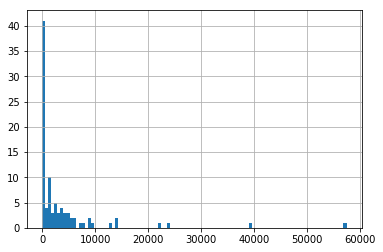

In [6]:
prod.yitemrevenue.hist(bins=100)

In [7]:
new_prod = prod[prod.yitemrevenue < 10000]

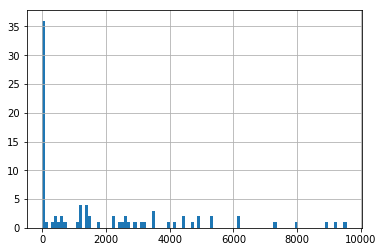

In [8]:
new_prod.yitemrevenue.hist(bins=100)

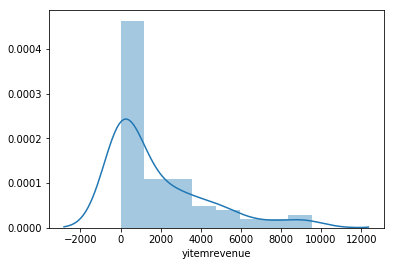

In [9]:
sns.distplot(new_prod.yitemrevenue)

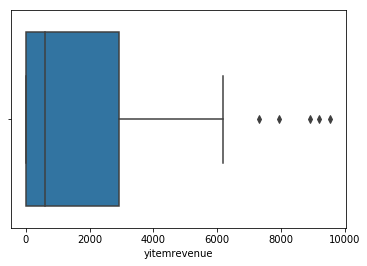

In [10]:
sns.boxplot(new_prod.yitemrevenue)

In [11]:
new_prod.describe()

,yitemrevenue,xcartadd,xcartuniqadd,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xproductviews,xuniqprodview,xprodviewinrs
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,8.500000e+01
mean,1819.286118,21.635294,16.270588,28908.035294,1.305882,0.752941,1877.188235,846.058824,680.094118,1.377072e+06
std,2439.612891,22.095489,16.612093,26021.014913,1.958033,1.153730,3453.606185,763.823268,661.986668,9.955587e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,225.000000,7.303500e+04
25%,0.000000,8.000000,6.000000,11970.000000,0.000000,0.000000,0.000000,589.000000,465.000000,7.764970e+05
50%,587.850000,15.000000,12.000000,22185.000000,0.000000,0.000000,0.000000,747.000000,588.000000,1.224479e+06
75%,2907.670000,25.000000,22.000000,41985.000000,2.000000,1.000000,1998.000000,876.000000,729.000000,1.703796e+06
max,9545.370000,122.000000,101.000000,121878.000000,8.000000,5.000000,15960.000000,6926.000000,6017.000000,6.919074e+06


## Setelah dibuang Outlier

In [12]:
lm = LinearRegression()

In [13]:
X = new_prod.drop(['yitemrevenue'], axis=1)
Y = new_prod['yitemrevenue']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
lm.score(X,Y)

0.3488230247449374

In [15]:
lm1 = smf.ols(formula='yitemrevenue~xcartadd+xcartuniqadd+xcartaddtotalrs+xcartremove+xcardtremovetotal+xcardtremovetotalrs+xproductviews+xuniqprodview+xprodviewinrs', data=new_prod).fit()

In [16]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yitemrevenue   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     4.464
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           0.000105
Time:                        14:12:16   Log-Likelihood:                -764.84
No. Observations:                  85   AIC:                             1550.
Df Residuals:                      75   BIC:                             1574.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -753.6595    517.191     -1.457      0.149   -1783.957     276.638
xcartadd               28.9504     76.830      0.377      0.707    -124.103     182.004
xcartuniqadd          -24.0469     97.013     -0.248      0.805    -217.307     169.213
xcartaddtotalrs         0.0001      0.018      0.006      0.995      -0.036       0.036
xcartremove          -116.5904    318.481     -0.366      0.715    -751.038     517.857
xcardtremovetotal    -112.0325    425.892     -0.263      0.793    -960.453     736.388
xcardtremovetotalrs    -0.0074      0.163     -0.046      0.964      -0.332       0.317
xproductviews          21.8723      6.259      3.495      0.001       9.404      34.341
xuniqprodview         -25.3633      7.004     -3.621      0.001     -39.315     -11.411
xprodviewinrs           0.0010      0.001      1.774      0.080      -0.000       0.002
==============================================================================
Omnibus:                        5.752   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.798
Skew:                           0.635   Prob(JB):                       0.0551
Kurtosis:                       2.844   Cond. No.                     3.95e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sebelum Dibuang Outlier

In [17]:
X_prev = prod.drop(['yitemrevenue'], axis=1)
Y_prev = prod['yitemrevenue']
lm.fit(X_prev,Y_prev)
lm.score(X_prev,Y_prev)

0.7746966458177061

In [18]:
lm1 = smf.ols(formula='yitemrevenue~xcartadd+xcartuniqadd+xcartaddtotalrs+xcartremove+xcardtremovetotal+xcardtremovetotalrs+xproductviews+xuniqprodview+xprodviewinrs', data=prod).fit()

In [19]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yitemrevenue   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     31.33
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           5.57e-23
Time:                        14:12:16   Log-Likelihood:                -889.68
No. Observations:                  92   AIC:                             1799.
Df Residuals:                      82   BIC:                             1825.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -355.5869    946.178     -0.376      0.708   -2237.836    1526.662
xcartadd               89.5503    115.743      0.774      0.441    -140.700     319.801
xcartuniqadd         -161.1280    158.434     -1.017      0.312    -476.303     154.047
xcartaddtotalrs         0.1013      0.013      7.549      0.000       0.075       0.128
xcartremove           597.7659    528.214      1.132      0.261    -453.021    1648.553
xcardtremovetotal   -1096.0898    796.820     -1.376      0.173   -2681.219     489.039
xcardtremovetotalrs    -0.2914      0.267     -1.090      0.279      -0.823       0.240
xproductviews           6.7968     10.047      0.676      0.501     -13.190      26.784
xuniqprodview          -7.9396     11.417     -0.695      0.489     -30.651      14.772
xprodviewinrs           0.0005      0.000      1.159      0.250      -0.000       0.001
==============================================================================
Omnibus:                       53.835   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.068
Skew:                           1.714   Prob(JB):                     1.04e-68
Kurtosis:                      11.362   Cond. No.                     4.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check Multico

In [20]:
corr_df = X_prev.corr(method='pearson')

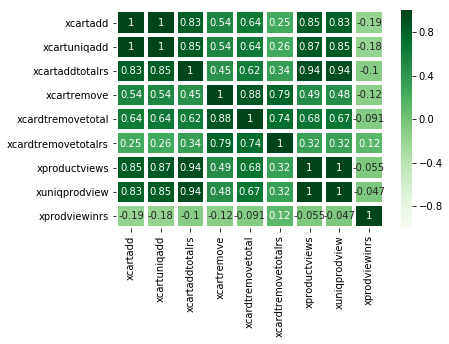

In [21]:
sns.heatmap(corr_df, cmap = 'Greens', vmax=1.0, vmin = -1.0, linewidth = 3, annot=True)
plt.show()

In [22]:
import scipy as sc

In [23]:
coef = sc.corrcoef(X_prev, rowvar = 0)
coef

array([[ 1.        ,  0.99828687,  0.82866926,  0.53940931,  0.63618597,
         0.24606523,  0.84502014,  0.82748429, -0.18735216],
       [ 0.99828687,  1.        ,  0.84890946,  0.54011112,  0.64446559,
         0.25526684,  0.86936077,  0.85318104, -0.18049376],
       [ 0.82866926,  0.84890946,  1.        ,  0.44757631,  0.62409939,
         0.33602016,  0.93975197,  0.93819036, -0.10296339],
       [ 0.53940931,  0.54011112,  0.44757631,  1.        ,  0.87906453,
         0.79391862,  0.49114958,  0.48152124, -0.12365768],
       [ 0.63618597,  0.64446559,  0.62409939,  0.87906453,  1.        ,
         0.74145401,  0.6810636 ,  0.67433336, -0.09113361],
       [ 0.24606523,  0.25526684,  0.33602016,  0.79391862,  0.74145401,
         1.        ,  0.32279882,  0.32220304,  0.12490845],
       [ 0.84502014,  0.86936077,  0.93975197,  0.49114958,  0.6810636 ,
         0.32279882,  1.        ,  0.9993684 , -0.05506033],
       [ 0.82748429,  0.85318104,  0.93819036,  0.48152124,  0

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
vif = [variance_inflation_factor(X_prev.values,j) for j in range(X_prev.shape[1])]

## Check Normalitas Residu

In [26]:
from scipy import stats

In [27]:
stats.shapiro(lm1.resid)

(0.861441969871521, 8.54630997082495e-08)

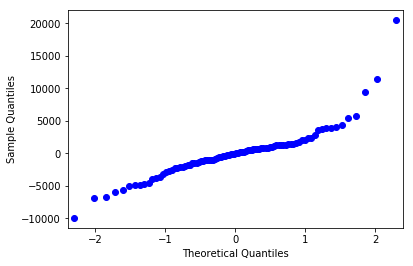

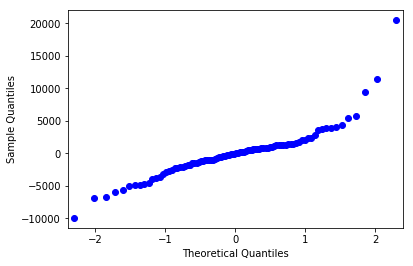

In [28]:
sm.qqplot(lm1.resid)

## Check Heterocesdacity

In [29]:
import statsmodels.stats.api as sma
# from statsmodels.compat import lzip

In [30]:
test = sma.het_goldfeldquandt(lm1.resid, lm1.model.exog)
test

(0.2916943373907659, 0.9998175289182352, 'increasing')

## Learning Again

Pilih berdasarkan VIF with 5 var

In [31]:
index_col = [0]

In [32]:
for idx,val in enumerate(vif):
    if val < 20:
        index_col.append(idx)

In [33]:
index_col

[0, 2, 3, 4, 5, 8]

In [34]:
data_train = prod.iloc[:, index_col]
data_train.head()

,yitemrevenue,xcartuniqadd,xcartaddtotalrs,xcartremove,xcardtremovetotal,xuniqprodview
0,39215.93,503,752186,10,10,20498
1,23819.47,622,425667,8,5,8718
2,4415.45,101,121878,2,2,6017
3,57435.56,196,609761,2,2,9733
4,0.00,22,58488,0,0,764


In [35]:
lm3 = smf.ols(formula='yitemrevenue~xcartuniqadd+xcartaddtotalrs+xcartremove+xcardtremovetotal+xuniqprodview', data=data_train).fit()

In [36]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yitemrevenue   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     55.92
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           1.41e-25
Time:                        14:12:17   Log-Likelihood:                -891.66
No. Observations:                  92   AIC:                             1795.
Df Residuals:                      86   BIC:                             1810.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           876.4698    519.100      1.688      0.095    -155.466    1908.406
xcartuniqadd        -17.9222     10.598     -1.691      0.094     -38.990       3.146
xcartaddtotalrs       0.0933      0.012      7.825      0.000       0.070       0.117
xcartremove         184.0735    437.807      0.420      0.675    -686.257    1054.404
xcardtremovetotal -1095.9739    726.470     -1.509      0.135   -2540.149     348.202
xuniqprodview        -0.4061      0.554     -0.733      0.466      -1.508       0.695
==============================================================================
Omnibus:                       63.013   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.969
Skew:                           2.040   Prob(JB):                     3.18e-93
Kurtosis:                      12.720   Cond. No.                     2.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Uji Normalitas Residu

In [37]:
stats.shapiro(lm3.resid)

(0.838249683380127, 1.2721103281876367e-08)

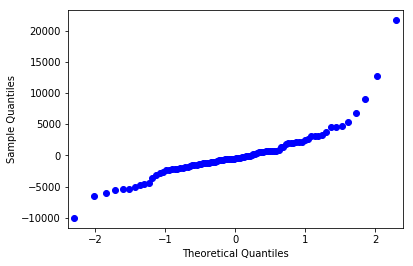

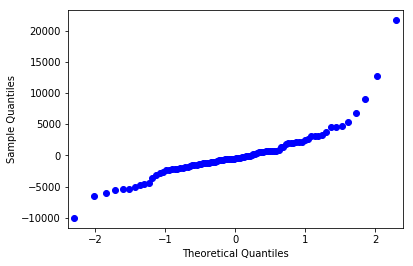

In [38]:
sm.qqplot(lm3.resid)

## Check Hetero

In [39]:
test = sma.het_goldfeldquandt(lm3.resid, lm3.model.exog)
test

(0.31421452242405257, 0.9998030394371837, 'increasing')

# Learning With Normalization

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
new_x = pd.DataFrame(scaler.fit_transform(data_train.iloc[:, [1,2,3,4,5]]), columns=["xcartuniqadd","xcartaddtotalrs","xcartremove","xcardtremovetotal","xuniqprodview"])

In [43]:
data_train2 = pd.concat([data_train[["yitemrevenue"]], new_x], axis=1)

In [44]:
data_train2.head()

,yitemrevenue,xcartuniqadd,xcartaddtotalrs,xcartremove,xcardtremovetotal,xuniqprodview
0,39215.93,5.648341,6.593755,3.884344,5.928625,7.860526
1,23819.47,7.070428,3.535771,2.978489,2.678128,3.090708
2,4415.45,0.844315,0.690663,0.260925,0.727829,1.997051
3,57435.56,1.979595,5.259886,0.260925,0.727829,3.501690
4,0.00,-0.099759,0.096990,-0.644929,-0.572370,-0.129932


In [45]:
lm4 = smf.ols(formula='yitemrevenue~xcartuniqadd+xcartaddtotalrs+xcartremove+xcardtremovetotal+xuniqprodview', data=data_train2).fit()

In [46]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yitemrevenue   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     55.92
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           1.41e-25
Time:                        14:12:17   Log-Likelihood:                -891.66
No. Observations:                  92   AIC:                             1795.
Df Residuals:                      86   BIC:                             1810.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3679.0822    422.369      8.711      0.000    2839.440    4518.724
xcartuniqadd      -1499.7237    886.831     -1.691      0.094   -3262.684     263.237
xcartaddtotalrs    9960.4941   1272.829      7.825      0.000    7430.195    1.25e+04
xcartremove         406.4085    966.616      0.420      0.675   -1515.160    2327.977
xcardtremovetotal -1685.8555   1117.476     -1.509      0.135   -3907.324     535.613
xuniqprodview     -1002.9874   1368.539     -0.733      0.466   -3723.552    1717.577
==============================================================================
Omnibus:                       63.013   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.969
Skew:                           2.040   Prob(JB):                     3.18e-93
Kurtosis:                      12.720   Cond. No.                         8.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

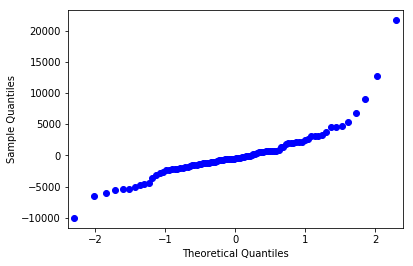

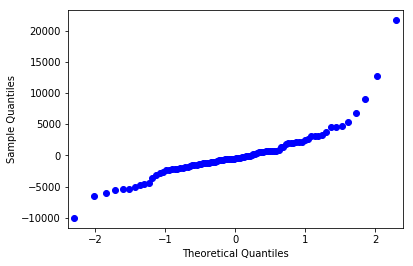

In [47]:
sm.qqplot(lm4.resid)

In [48]:
test = sma.het_goldfeldquandt(lm4.resid, lm4.model.exog)
test

(0.3142145224240525, 0.9998030394371837, 'increasing')

# Earth Model

In [51]:
from pyearth import Earth

In [52]:
#fit an earth model 
x = prod.drop(['yitemrevenue'], 1)
y = prod['yitemrevenue']

In [54]:
#Fit an Earth model
model = Earth()
model.fit(x,y)

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=None, max_degree=None,
   max_terms=None, min_search_points=None, minspan=None,
   minspan_alpha=None, penalty=None, smooth=None, thresh=None,
   use_fast=None, verbose=0, zero_tol=None)

In [55]:
print(model.summary())

Earth Model
--------------------------------------------------
Basis Function               Pruned  Coefficient  
--------------------------------------------------
(Intercept)                  No      -1670.14     
xcartaddtotalrs              Yes     None         
h(xcardtremovetotal-3)       Yes     None         
h(3-xcardtremovetotal)       Yes     None         
h(xcartaddtotalrs-46987)     Yes     None         
h(46987-xcartaddtotalrs)     Yes     None         
h(xproductviews-1115)        No      -12.1955     
h(1115-xproductviews)        Yes     None         
xprodviewinrs                Yes     None         
xcardtremovetotalrs          Yes     None         
xproductviews                Yes     None         
h(xcartaddtotalrs-70676)     No      0.160767     
h(70676-xcartaddtotalrs)     Yes     None         
xuniqprodview                Yes     None         
h(xcardtremovetotalrs-4598)  Yes     None         
h(4598-xcardtremovetotalrs)  No      0.563219     
h(xprodviewinrs-1.1

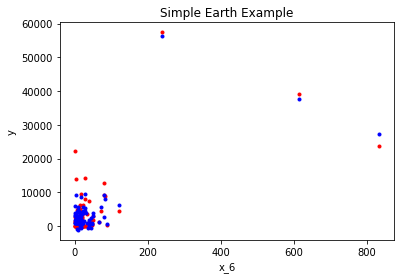

In [56]:
#"xcartadd","xcartuniqadd","xcartaddtotalrs","xcartremove","xcardtremovetotal",
#          "xcardtremovetotalrs","xproductviews","xuniqprodview","xprodviewinrs"
    
y_hat = model.predict(x)
plt.figure()
plt.plot(x["xcartadd"],y,'r.')
plt.plot(x["xcartadd"],y_hat,'b.')
plt.xlabel('x_6')
plt.ylabel('y')
plt.title('Simple Earth Example')
plt.show()